# **Pranav Singh Mahara**
# **21BBS0188**
# **Lab Digital Assignment - 4**

# **Question - 1**
Consider a dataset of 50 user records with the attributes “Name”, “location” ,“Height”, “Weight”, ”Age”. Do the following tasks.

i) Create the dataset for the attributes given.

ii) Implement the Demo on Classification Technique using KNN.


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [46]:
file_path = '/content/user_health_data.csv'
data = pd.read_csv(file_path)

data.head()

,Name,Location,Height,Weight,Age
0,user1,Bombay,174,73,28
1,user2,Chennai,168,65,56
2,user3,Chennai,176,61,52
3,user4,Delhi,185,77,43
4,user5,Delhi,167,82,34


In [47]:
data['Label'] = data.apply(lambda row: 'Overweight' if row['Weight'] / ((row['Height'] / 100) ** 2) > 25 else 'Healthy', axis=1)


X = data[['Height', 'Weight', 'Age']]
y = data['Label']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred = knn.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(classification_rep, "\n\n\n The accuracy of the KNN Classifier is ", accuracy)

              precision    recall  f1-score   support

     Healthy       0.67      0.80      0.73         5
  Overweight       0.89      0.80      0.84        10

    accuracy                           0.80        15
   macro avg       0.78      0.80      0.78        15
weighted avg       0.81      0.80      0.80        15
 


 The accuracy of the KNN Classifier is  0.8


In [50]:
X_plot = data[['Height', 'Weight']]
y_plot = data['Label'].apply(lambda x: 1 if x == 'Overweight' else 0)

X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)

In [51]:
knn_plot = KNeighborsClassifier(n_neighbors=3)
knn_plot.fit(X_train_plot, y_train_plot)

KNeighborsClassifier(n_neighbors=3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

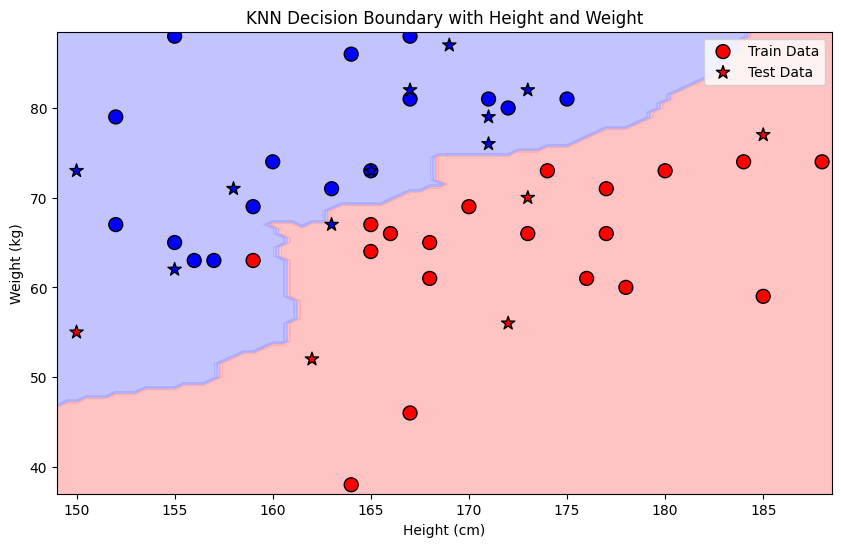

In [52]:
x_min, x_max = X_plot['Height'].min() - 1, X_plot['Height'].max() + 1
y_min, y_max = X_plot['Weight'].min() - 1, X_plot['Weight'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))


Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['red', 'blue'])


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
plt.scatter(X_train_plot['Height'], X_train_plot['Weight'], c=y_train_plot, cmap=cmap_bold, edgecolor='k', s=100, label="Train Data")
plt.scatter(X_test_plot['Height'], X_test_plot['Weight'], c=y_test_plot, cmap=cmap_bold, marker='*', edgecolor='k', s=100, label="Test Data")
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('KNN Decision Boundary with Height and Weight')
plt.legend(['Healthy', 'Overweight'], loc='upper right')
plt.legend()
plt.show()

# **Question - 2**
A probabilistic based learning algorithm used for classifying the following data that depicts the people choice of buying the phone.

Apply the same to identify the probability of getting loan approval for the case age 30-70, has criminal record and More than 5 year exp.

In [53]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [54]:
data = {
    "Income_Range": ["<30", "30-70", "30-70", "30-70", "30-70", "30-70", ">70", ">70", "<30", "30-70", "30-70", "30-70"],
    "Criminal_Record": ["No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes"],
    "Experience": ["1-5", "1", "1", "1-5", ">5", "1-5", ">5", ">5", "1-5", "1-5", "1-5", ">5"],
    "Loan_Approved": ["Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)

In [55]:
income_mapping = {"<30": 0, "30-70": 1, ">70": 2}
criminal_mapping = {"No": 0, "Yes": 1}
experience_mapping = {"1": 0, "1-5": 1, ">5": 2}
loan_mapping = {"No": 0, "Yes": 1}

df["Income_Range"] = df["Income_Range"].map(income_mapping)
df["Criminal_Record"] = df["Criminal_Record"].map(criminal_mapping)
df["Experience"] = df["Experience"].map(experience_mapping)
df["Loan_Approved"] = df["Loan_Approved"].map(loan_mapping)

In [56]:
X = df[["Income_Range", "Criminal_Record", "Experience"]]
y = df["Loan_Approved"]

model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [57]:
y_pred = model.predict(X)

report = classification_report(y, y_pred, target_names=["Not Approved", "Approved"])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

Not Approved       0.62      0.83      0.71         6
    Approved       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



In [58]:
test_data = [[income_mapping["30-70"], criminal_mapping["Yes"], experience_mapping[">5"]]]

prediction = model.predict(test_data)
prediction_label = "Yes" if prediction[0] == 1 else "No"

print("Loan Approval Prediction for test case:", prediction_label)

Loan Approval Prediction for test case: Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [59]:
test_data = [[income_mapping["30-70"], criminal_mapping["Yes"], experience_mapping[">5"]]]

probabilities = model.predict_proba(test_data)
prob_no, prob_yes = probabilities[0]

print(f"Probability of Loan Not Approved (No): {prob_no * 100:.2f}%")
print(f"Probability of Loan Approved (Yes): {prob_yes * 100:.2f}%")

Probability of Loan Not Approved (No): 22.11%
Probability of Loan Approved (Yes): 77.89%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
